In [ ]:
pip install qiskit

In [ ]:
pip install qiskit-aer

In [ ]:
!pip install pylatexenc

In [ ]:
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.circuit.library import QFT , CCXGate, UnitaryGate
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Initialize parameters
# window_scaling = 2.0062463823972267
padded_result_coeffs = [2.84459484e-01, -1.60769035e-01, -6.52830735e-01, -1.40302564e-01,
    4.04440838e-01, -5.49152208e-02, -5.29882315e-01,  7.34968555e-16]

num_qubits = int(np.log2(len(padded_result_coeffs)))
qc_test = QuantumCircuit(num_qubits + 1, 1)  # Increased from num_qubits*2 to num_qubits*3 for ancilla

# Inverted initialization
# qc_test.initialize(padded_result_coeffs, range(1,num_qubits+1))
qc_test.initialize(padded_result_coeffs, range(0,num_qubits))


# qc_test.append(QFT(num_qubits), range(num_qubits))
# qc_test.append(QFT(num_qubits), range(num_qubits, 2 * num_qubits))

# New code with CCX gates
qc_test.barrier()

qc_test.cx(2, 3)

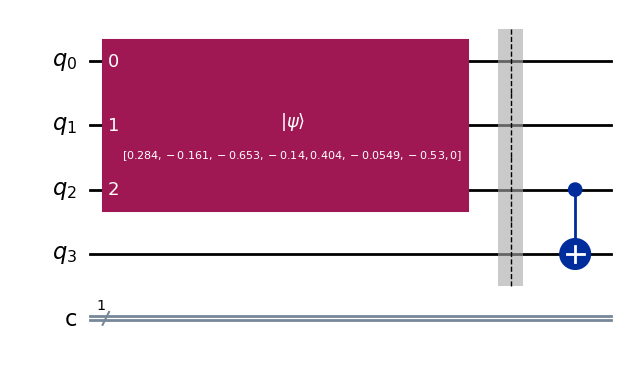

In [ ]:
qc_test.draw('mpl')

In [ ]:
# Use the Aer's Statevector simulator
simulator = Aer.get_backend('statevector_simulator')

# Transpile the quantum circuit for the simulator
compiled_circuit = transpile(qc_test, simulator)

# Run the simulation
result = simulator.run(compiled_circuit).result()

# Get the final statevector
statevector = result.get_statevector()

# Print the statevector
print("Final Statevector:", statevector)

[2.84459484e-01, -1.60769035e-01, -6.52830735e-01, -1.40302564e-01,
    4.04440838e-01, -5.49152208e-02, -5.29882315e-01,  7.34968555e-16]

Final Statevector: Statevector([ 2.84459484e-01+0.j, -1.60769035e-01+0.j, -6.52830735e-01+0.j,
             -1.40302564e-01+0.j,  0.00000000e+00+0.j, -0.00000000e+00+0.j,
             -0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
             -0.00000000e+00+0.j, -0.00000000e+00+0.j, -0.00000000e+00+0.j,
              4.04440838e-01+0.j, -5.49152208e-02+0.j, -5.29882315e-01+0.j,
              7.34968555e-16+0.j],
            dims=(2, 2, 2, 2))


[0.284459484,
 -0.160769035,
 -0.652830735,
 -0.140302564,
 0.404440838,
 -0.0549152208,
 -0.529882315,
 7.34968555e-16]

In [ ]:
# [[1, 0, 0, 0, 0, 0, 0, 0,]
#  [0, 1, 0, 0, 0, 0, 0, 0,]
#  [0, 0, 0, 0, 1, 0, 0, 0,]
#  [0, 0, 0, 0, 0, 1, 0, 0,]
#  [0, 0, 1, 0, 0, 0, 0, 0,]
#  [0, 0, 0, 1, 0, 0, 0, 0,]
#  [0, 0, 0, 0, 0, 0, 1, 0,]
#  [0, 0, 0, 0, 0, 0, 0, 1]]
from qiskit import QuantumCircuit
from qiskit.circuit.library import UnitaryGate
import numpy as np

# Define the permutation matrix
perm_matrix = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1]
])

# Create the unitary gate from the permutation matrix
unitary_gate = UnitaryGate(perm_matrix)

# Create a controlled version of the unitary gate
# controlled_gate = unitary_gate.control()

# Initialize a quantum circuit with enough qubits
qc = QuantumCircuit(3)  # Adjust the number of qubits as needed, 4 for controlled version

# Apply the controlled gate (Assume control qubit is 0 and target qubits are 1, 2, 3)
# qc.append(controlled_gate, [0, 1, 2, 3])
qc.append(unitary_gate)

# Print the quantum circuit
print(qc)

CircuitError: 'The amount of qubit(0)/clbit(0) arguments does not match the gate expectation (3).'

In [ ]:
# Apply the controlled gate (Assume control qubit is 0 and target qubits are 1, 2, 3)
qc_test.append(controlled_gate, [3, 0, 1, 2])

In [ ]:
# Initialize parameters
# window_scaling = 2.0062463823972267
padded_result_coeffs = [2.84459484e-01, -1.60769035e-01, -6.52830735e-01, -1.40302564e-01,
    4.04440838e-01, -5.49152208e-02, -5.29882315e-01,  7.34968555e-16]

num_qubits = int(np.log2(len(padded_result_coeffs)))
qc_test = QuantumCircuit(num_qubits + 1, 1)  # Increased from num_qubits*2 to num_qubits*3 for ancilla

# Inverted initialization
# qc_test.initialize(padded_result_coeffs, range(1,num_qubits+1))
qc_test.initialize(padded_result_coeffs, range(0,num_qubits))


# qc_test.append(QFT(num_qubits), range(num_qubits))
# qc_test.append(QFT(num_qubits), range(num_qubits, 2 * num_qubits))

# New code with CCX gates
qc_test.barrier()

qc_test.cx(2, 3)

# Define the permutation matrix
perm_matrix = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1]
])

# Create the unitary gate from the permutation matrix
unitary_gate = UnitaryGate(perm_matrix)

qc_test.append(unitary_gate, [0, 1, 2])

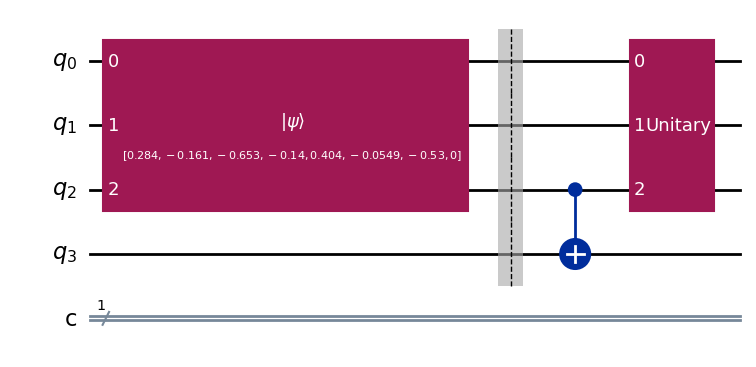

In [ ]:
qc_test.draw('mpl')

In [ ]:
# Use the Aer's Statevector simulator
simulator = Aer.get_backend('statevector_simulator')

# Transpile the quantum circuit for the simulator
compiled_circuit = transpile(qc_test, simulator)

# Run the simulation
result = simulator.run(compiled_circuit).result()

# Get the final statevector
statevector = result.get_statevector()

# Print the statevector
print("Final Statevector:", statevector)

[2.84459484e-01, -1.60769035e-01, -6.52830735e-01, -1.40302564e-01,
    4.04440838e-01, -5.49152208e-02, -5.29882315e-01,  7.34968555e-16]

Final Statevector: Statevector([ 2.84459484e-01+0.j, -1.60769035e-01+0.j,  0.00000000e+00+0.j,
              0.00000000e+00+0.j, -6.52830735e-01+0.j, -1.40302564e-01+0.j,
              0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
              0.00000000e+00+0.j,  4.04440838e-01+0.j, -5.49152208e-02+0.j,
              0.00000000e+00+0.j,  0.00000000e+00+0.j, -5.29882315e-01+0.j,
              7.34968555e-16+0.j],
            dims=(2, 2, 2, 2))


[0.284459484,
 -0.160769035,
 -0.652830735,
 -0.140302564,
 0.404440838,
 -0.0549152208,
 -0.529882315,
 7.34968555e-16]

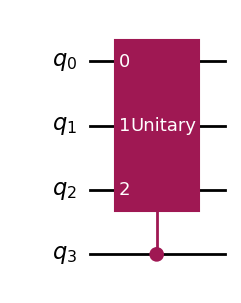

In [ ]:
# Define the permutation matrix
perm_matrix = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1]
])

# Create the unitary gate from the permutation matrix
unitary_gate = UnitaryGate(perm_matrix)

# Make it a controlled gate with the third qubit as the control
controlled_gate = unitary_gate.control(1)

# Create a quantum circuit
qc = QuantumCircuit(4)

# Append the controlled gate, with qubit 2 as the control and qubits 0 and 1 as the target
qc.append(controlled_gate, [3, 0, 1, 2])

# Draw the circuit
qc.draw('mpl')

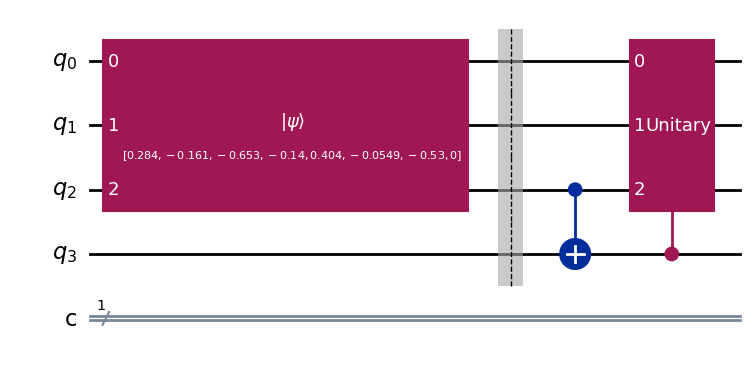

In [ ]:
# Initialize parameters
# window_scaling = 2.0062463823972267
padded_result_coeffs = [2.84459484e-01, -1.60769035e-01, -6.52830735e-01, -1.40302564e-01,
    4.04440838e-01, -5.49152208e-02, -5.29882315e-01,  7.34968555e-16]

num_qubits = int(np.log2(len(padded_result_coeffs)))
qc_test = QuantumCircuit(num_qubits + 1, 1)  # Increased from num_qubits*2 to num_qubits*3 for ancilla

# Inverted initialization
# qc_test.initialize(padded_result_coeffs, range(1,num_qubits+1))
qc_test.initialize(padded_result_coeffs, range(0,num_qubits))


# qc_test.append(QFT(num_qubits), range(num_qubits))
# qc_test.append(QFT(num_qubits), range(num_qubits, 2 * num_qubits))

# New code with CCX gates
qc_test.barrier()

qc_test.cx(2, 3)

# Define the permutation matrix
perm_matrix = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1]
])

# Create the unitary gate from the permutation matrix
unitary_gate = UnitaryGate(perm_matrix)

# Make it a controlled gate with the third qubit as the control
controlled_gate = unitary_gate.control(1)

# Create a quantum circuit
# qc_test = QuantumCircuit(4)

# Append the controlled gate, with qubit 2 as the control and qubits 0 and 1 as the target
qc_test.append(controlled_gate, [3, 0 ,1 ,2])

# Draw the circuit
qc_test.draw('mpl')

# qc_test.append(unitary_gate, [0, 1, 2])

In [ ]:
# Use the Aer's Statevector simulator
simulator = Aer.get_backend('statevector_simulator')

# Transpile the quantum circuit for the simulator
compiled_circuit = transpile(qc_test, simulator)

# Run the simulation
result = simulator.run(compiled_circuit).result()

# Get the final statevector
statevector = result.get_statevector()

# Print the statevector
print("Final Statevector:", np.abs(statevector))

[2.84459484e-01, -1.60769035e-01, -6.52830735e-01, -1.40302564e-01,
    4.04440838e-01, -5.49152208e-02, -5.29882315e-01,  7.34968555e-16]

Final Statevector: [2.84459484e-01 1.60769035e-01 6.52830735e-01 1.40302564e-01
 4.79236002e-16 5.11899600e-17 2.63312510e-16 3.18349526e-17
 1.40144402e-16 0.00000000e+00 4.04440838e-01 5.49152208e-02
 1.47522908e-16 4.72891156e-17 5.29882315e-01 7.98276553e-16]


[0.284459484,
 -0.160769035,
 -0.652830735,
 -0.140302564,
 0.404440838,
 -0.0549152208,
 -0.529882315,
 7.34968555e-16]

In [ ]:
qc_test.h(3)

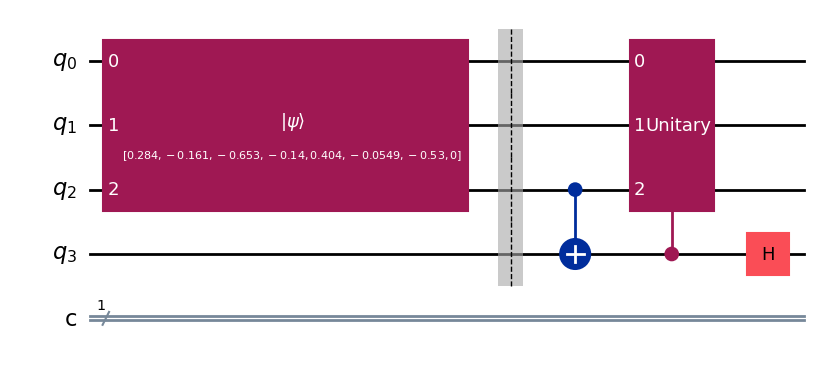

In [ ]:
qc_test.draw('mpl')

In [ ]:
# Use the Aer's Statevector simulator
simulator = Aer.get_backend('statevector_simulator')

# Transpile the quantum circuit for the simulator
compiled_circuit = transpile(qc_test, simulator)

# Run the simulation
result = simulator.run(compiled_circuit).result()

# Get the final statevector
statevector = result.get_statevector()

# Print the statevector
print("Final Statevector:", statevector)
print()
print("adjusted Final Statevector:", np.sqrt(2)*np.abs(statevector))

[2.84459484e-01, -1.60769035e-01, -6.52830735e-01, -1.40302564e-01,
    4.04440838e-01, -5.49152208e-02, -5.29882315e-01,  7.34968555e-16]

Final Statevector: Statevector([-1.66683434e-01-1.12584333e-01j,
              9.42051023e-02+6.36297101e-02j,
              1.45547901e-01+9.83085900e-02j,
              1.14390880e-01+7.72639524e-02j,
              1.95941620e-17-1.23171621e-17j,
             -9.97247635e-18-4.04923154e-17j,
              3.10492737e-01+2.09718607e-01j,
             -3.78915309e-16-2.82853913e-16j,
             -1.66683434e-01-1.12584333e-01j,
              9.42051023e-02+6.36297101e-02j,
              6.19524628e-01+4.18450504e-01j,
              5.00340342e-02+3.37948903e-02j,
              7.31983846e-17+2.57169463e-16j,
              2.76207625e-17+1.21825961e-16j,
             -3.10492737e-01-2.09718607e-01j,
              4.80863778e-16+2.96057890e-16j],
            dims=(2, 2, 2, 2))

adjusted Final Statevector: [2.84459484e-01 1.60769035e-01 2.48389897e-01 1.95217785e-01
 3.27305260e-17 5.89758915e-17 5.29882315e-01 6.68704939e-16
 2.84459484e-01 1.60769035e-01 1.05727157e+00 8.53873432e-02
 

[0.284459484,
 -0.160769035,
 -0.652830735,
 -0.140302564,
 0.404440838,
 -0.0549152208,
 -0.529882315,
 7.34968555e-16]

In [ ]:

# Define the original permutation matrix (acts on 3 qubits)
perm_matrix = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1]
])

# Identity matrix for the other qubits
identity_matrix = np.eye(8)

# Construct the controlled matrix:
# Block matrix with identity on top-left and the permutation matrix on bottom-right
controlled_perm_matrix = np.block([
    [identity_matrix, np.zeros((8, 8))],
    [np.zeros((8, 8)), perm_matrix]
])

# print("Controlled Permutation Matrix:")
# print(controlled_perm_matrix)

# Create the unitary gate from the permutation matrix
unitary_gate = UnitaryGate(controlled_perm_matrix)

Controlled Permutation Matrix:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


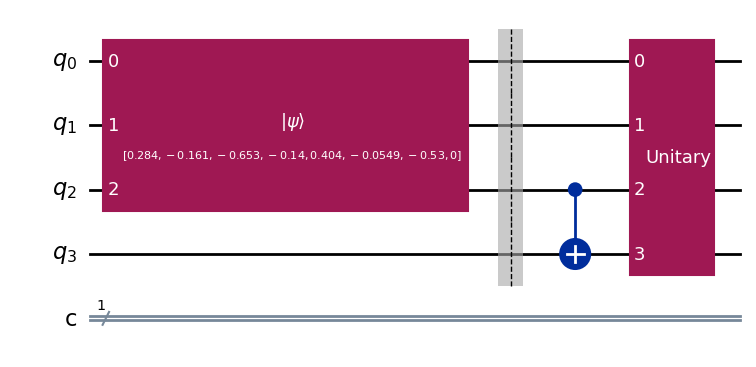

In [ ]:
# Initialize parameters
# window_scaling = 2.0062463823972267
padded_result_coeffs = [2.84459484e-01, -1.60769035e-01, -6.52830735e-01, -1.40302564e-01,
    4.04440838e-01, -5.49152208e-02, -5.29882315e-01,  7.34968555e-16]

num_qubits = int(np.log2(len(padded_result_coeffs)))
qc_test = QuantumCircuit(num_qubits + 1, 1)  # Increased from num_qubits*2 to num_qubits*3 for ancilla

# Inverted initialization
# qc_test.initialize(padded_result_coeffs, range(1,num_qubits+1))
qc_test.initialize(padded_result_coeffs, range(0,num_qubits))


# qc_test.append(QFT(num_qubits), range(num_qubits))
# qc_test.append(QFT(num_qubits), range(num_qubits, 2 * num_qubits))

# New code with CCX gates
qc_test.barrier()

qc_test.cx(2, 3)

# Define the original permutation matrix (acts on 3 qubits)
perm_matrix = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1]
])

# Identity matrix for the other qubits
identity_matrix = np.eye(8)

# Construct the controlled matrix:
# Block matrix with identity on top-left and the permutation matrix on bottom-right
controlled_perm_matrix = np.block([
    [identity_matrix, np.zeros((8, 8))],
    [np.zeros((8, 8)), perm_matrix]
])

# print("Controlled Permutation Matrix:")
# print(controlled_perm_matrix)

# Create the unitary gate from the permutation matrix
unitary_gate = UnitaryGate(controlled_perm_matrix)

# Append the controlled gate, with qubit 2 as the control and qubits 0 and 1 as the target
qc_test.append(unitary_gate, [0 ,1 ,2, 3])

# Draw the circuit
qc_test.draw('mpl')

# qc_test.append(unitary_gate, [0, 1, 2])

In [ ]:
# Use the Aer's Statevector simulator
simulator = Aer.get_backend('statevector_simulator')

# Transpile the quantum circuit for the simulator
compiled_circuit = transpile(qc_test, simulator)

# Run the simulation
result = simulator.run(compiled_circuit).result()

# Get the final statevector
statevector = result.get_statevector()

# Print the statevector
print("Final Statevector:", statevector)
print()
print("adjusted Final Statevector:", np.sqrt(2)*np.abs(statevector))

[2.84459484e-01, -1.60769035e-01, -6.52830735e-01, -1.40302564e-01,
    4.04440838e-01, -5.49152208e-02, -5.29882315e-01,  7.34968555e-16]

Final Statevector: Statevector([ 2.84459484e-01+0.j, -1.60769035e-01+0.j, -6.52830735e-01+0.j,
             -1.40302564e-01+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
              0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
              0.00000000e+00+0.j,  4.04440838e-01+0.j, -5.49152208e-02+0.j,
              0.00000000e+00+0.j,  0.00000000e+00+0.j, -5.29882315e-01+0.j,
              7.34968555e-16+0.j],
            dims=(2, 2, 2, 2))

adjusted Final Statevector: [4.02286460e-01 2.27361750e-01 9.23242079e-01 1.98417789e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.71965718e-01 7.76618500e-02
 0.00000000e+00 0.00000000e+00 7.49366756e-01 1.03940250e-15]


[0.284459484,
 -0.160769035,
 -0.652830735,
 -0.140302564,
 0.404440838,
 -0.0549152208,
 -0.529882315,
 7.34968555e-16]

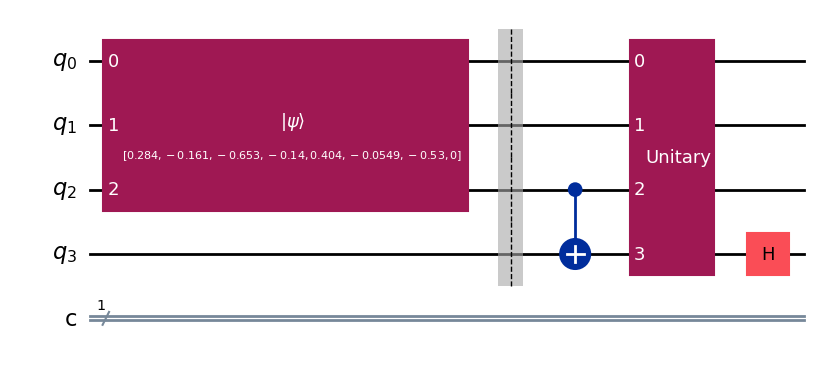

In [ ]:
qc_test.h(3)
qc_test.draw('mpl')

In [ ]:
# Use the Aer's Statevector simulator
simulator = Aer.get_backend('statevector_simulator')

# Transpile the quantum circuit for the simulator
compiled_circuit = transpile(qc_test, simulator)

# Run the simulation
result = simulator.run(compiled_circuit).result()

# Get the final statevector
statevector = result.get_statevector()

# Print the statevector
print("Final Statevector:", statevector)
print()
print("adjusted Final Statevector with abs:", np.sqrt(2)*np.abs(statevector))
print("adjusted Final Statevector:", np.sqrt(2)*statevector)


[2.84459484e-01, -1.60769035e-01, -6.52830735e-01, -1.40302564e-01,
    4.04440838e-01, -5.49152208e-02, -5.29882315e-01,  7.34968555e-16]

Final Statevector: Statevector([ 2.01143230e-01+0.00000000e+00j,
             -1.13680875e-01+0.00000000e+00j,
             -1.75638181e-01-3.50227993e-17j,
             -1.38039819e-01+4.75541680e-18j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
             -3.74683378e-01+4.58854800e-17j,
              5.19701249e-16-6.36450471e-32j,
              2.01143230e-01+0.00000000e+00j,
             -1.13680875e-01+0.00000000e+00j,
             -7.47603899e-01+3.50227993e-17j,
             -6.03779694e-02-4.75541680e-18j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              3.74683378e-01-4.58854800e-17j,
             -5.19701249e-16+6.36450471e-32j],
            dims=(2, 2, 2, 2))

adjusted Final Statevector with abs: [2.84459484e-01 1.60769035e-01 2.48389897e-01 1.95217785e-01
 0.00000000e+00 0.00000000e+00 5.29882315e-01 7.34968555e-16
 2.84459484e-01 1.60769035e-01 1.05727157e+00 8.53873

[0.284459484,
 -0.160769035,
 -0.652830735,
 -0.140302564,
 0.404440838,
 -0.0549152208,
 -0.529882315,
 7.34968555e-16]

# New section

In [ ]:
qc_test.measure(0,0)
# If the reult is 0, there in other qubits we will have the sum [1, 2, (3+5), (4+6), 0, 0, 7, 8]
# we need another permutaion gate to rearrange last coefficients.

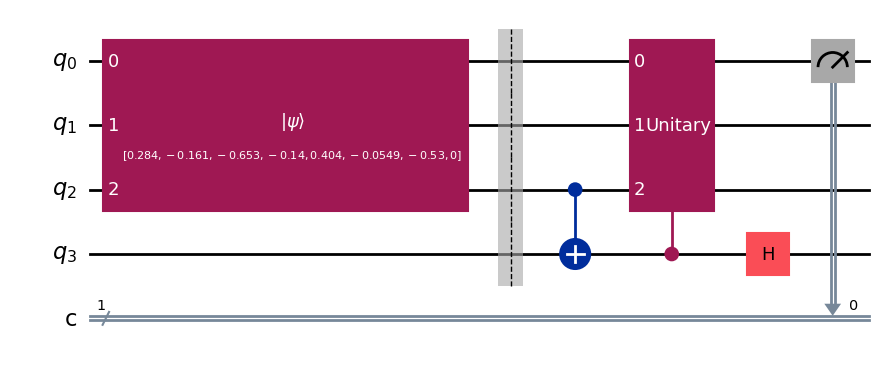

In [ ]:
qc_test.draw('mpl')

In [ ]:
# Execute the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
state_simulator = Aer.get_backend('statevector_simulator')

compiled_circuit = transpile(qc_test, simulator)

# Run the circuit in a loop until the desired state is obtained
desired_state = '0' # Only 0 in the measured register
result_counts = None

while True:
    # qc_test.save_statevector(label = 'test', pershot = True)
    result = simulator.run(qc_test, backend=simulator, shots=1).result()
    result_counts = result.get_counts(qc_test)

    # Debug print to understand intermediate results
    print(f"Intermediate result counts: {result_counts}")
    # print(result.data(0)['test'])

    # Check if the desired state is obtained
    if desired_state in [state[-num_qubits:] for state in result_counts.keys()]:
        break


AerError: 'unknown instruction: c-unitary'

In [ ]:
# Use the Aer's Statevector simulator
simulator = Aer.get_backend('statevector_simulator')

# Transpile the quantum circuit for the simulator
compiled_circuit = transpile(qc_test, simulator)

# Run the simulation
result = simulator.run(compiled_circuit).result()

# Get the final statevector
statevector = result.get_statevector()

# Print the statevector
print("Final Statevector:", statevector)

Final Statevector: Statevector([-1.70882980e-01-1.15420866e-01j,
              0.00000000e+00+0.00000000e+00j,
              1.49214943e-01+1.00785450e-01j,
              0.00000000e+00+0.00000000e+00j,
              2.00878318e-17-1.26274898e-17j,
              0.00000000e+00-0.00000000e+00j,
              3.18315521e-01+2.15002413e-01j,
              0.00000000e+00-0.00000000e+00j,
             -1.70882980e-01-1.15420866e-01j,
              0.00000000e+00+0.00000000e+00j,
              6.35133391e-01+4.28993256e-01j,
              0.00000000e+00+0.00000000e+00j,
              7.50425990e-17+2.63648781e-16j,
              0.00000000e+00+0.00000000e+00j,
             -3.18315521e-01-2.15002413e-01j,
              0.00000000e+00+0.00000000e+00j],
            dims=(2, 2, 2, 2))


In [ ]:
# Use the Aer's Statevector simulator
simulator = Aer.get_backend('statevector_simulator')

# Transpile the quantum circuit for the simulator
compiled_circuit = transpile(qc_test, simulator)

# Run the simulation
result = simulator.run(compiled_circuit).result()

# Get the final statevector
statevector = result.get_statevector()

# Print the statevector
print("Final Statevector:", statevector)

Final Statevector: Statevector([ 0.00000000e+00-0.00000000e+00j,
             -2.35725973e-01-1.59218290e-01j,
              0.00000000e+00+0.00000000e+00j,
             -1.33226133e-01-8.99859991e-02j,
              0.00000000e+00+0.00000000e+00j,
              5.40987974e-01+3.65403860e-01j,
              0.00000000e+00+0.00000000e+00j,
             -4.55071620e-02-3.07372686e-02j,
              0.00000000e+00-0.00000000e+00j,
             -3.35152158e-01-2.26374518e-01j,
              0.00000000e+00+0.00000000e+00j,
             -1.16265972e-01-7.85304608e-02j,
              0.00000000e+00+0.00000000e+00j,
              4.39103040e-01+2.96586899e-01j,
              0.00000000e+00-0.00000000e+00j,
              6.69311953e-16+4.08686888e-16j],
            dims=(2, 2, 2, 2))


Final Statevector: Statevector ([ 2.84459484e-01+0.j,  0.00000000e+00+0.j, -0.00000000e+00+0.j,
             -1.60769035e-01+0.j, -6.52830735e-01+0.j, -0.00000000e+00+0.j,
             -0.00000000e+00+0.j, -1.40302564e-01+0.j,  4.04440838e-01+0.j,
              0.00000000e+00+0.j, -0.00000000e+00+0.j, -5.49152208e-02+0.j,
             -5.29882315e-01+0.j, -0.00000000e+00+0.j,  0.00000000e+00+0.j,
              7.34968555e-16+0.j],
            dims=(2, 2, 2, 2))



---


---



---


